In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from DynLaborFertModel import DynLaborFertModelClass

## Initialization
Models are initialized with the same parameters used in lectures for ease of comparison. Each model below only differ in values of $\beta_1$

In [2]:
model01 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.01,'theta':1})
par01 = model01.par
sol01 = model01.sol
sim01 = model01.sim

model02 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.02,'theta':1})
par02 = model02.par
sol02 = model02.sol
sim02 = model02.sim

model05 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'theta':1}) #beta_1 = 0.05
par05 = model05.par
sol05 = model05.sol
sim05 = model05.sim

model07 = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.07,'theta':1})
par07 = model07.par
sol07 = model07.sol
sim07 = model07.sim

model10 =DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1':0.1,'theta':1})
par10 = model10.par
sol10 = model10.sol
sim10 = model10.sim

## Problem 1

In [3]:
models = (model05, model01, model02, model05, model07, model10)
for m in models:
    m.solve()
    m.simulate()
simulations = {
    r'$\beta_1=0.01$': sim01,
    r'$\beta_1=0.02$': sim02,
    r'$\beta_1=0.05$': sim05,
    r'$\beta_1=0.07$': sim07,
    r'$\beta_1=0.1$': sim10,
}

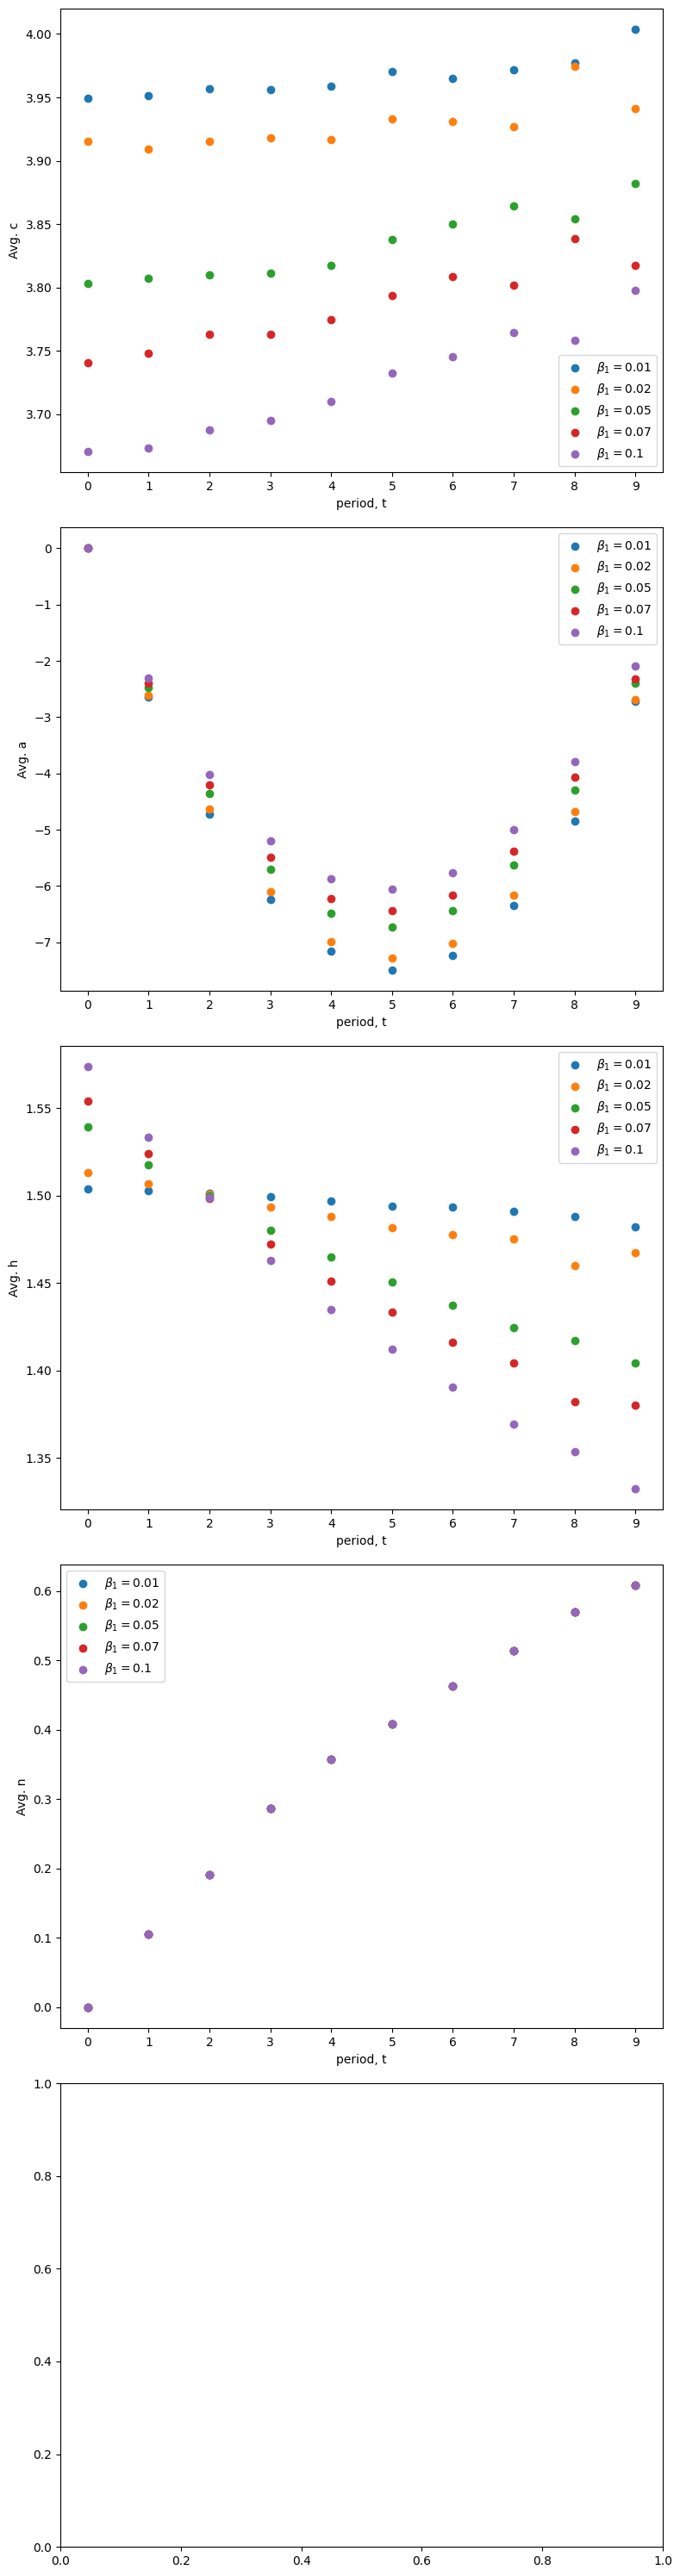

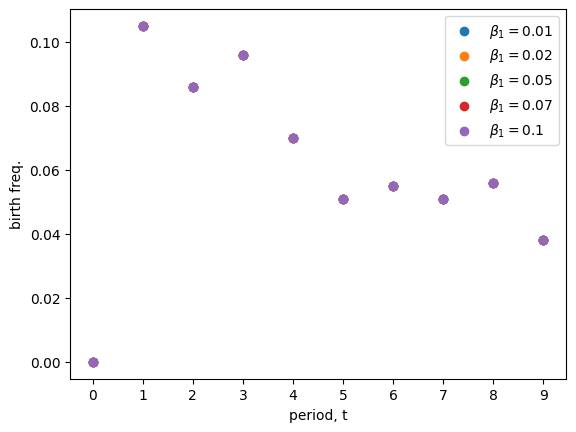

In [12]:
for label, data in simulations.items():
    birth = np.zeros(data.n.shape, dtype=np.int_)
    birth[:, 1:] = (data.n[:, 1:] - data.n[:, :-1]) > 0

In [14]:
periods = np.tile([t for t in range(par05.simT)],(par05.simN,1))
time_of_birth = np.max(periods * birth, axis=1)

I = time_of_birth>0
time_of_birth[~I] = -1000 # never as a child
time_of_birth = np.transpose(np.tile(time_of_birth , (par05.simT,1)))

time_since_birth = periods - time_of_birth

In [15]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)

event_hours = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours[t] = np.mean(sim05.h[time_since_birth==time])

# relative to period before birth
event_hours_rel = event_hours - event_hours[event_grid==-1]


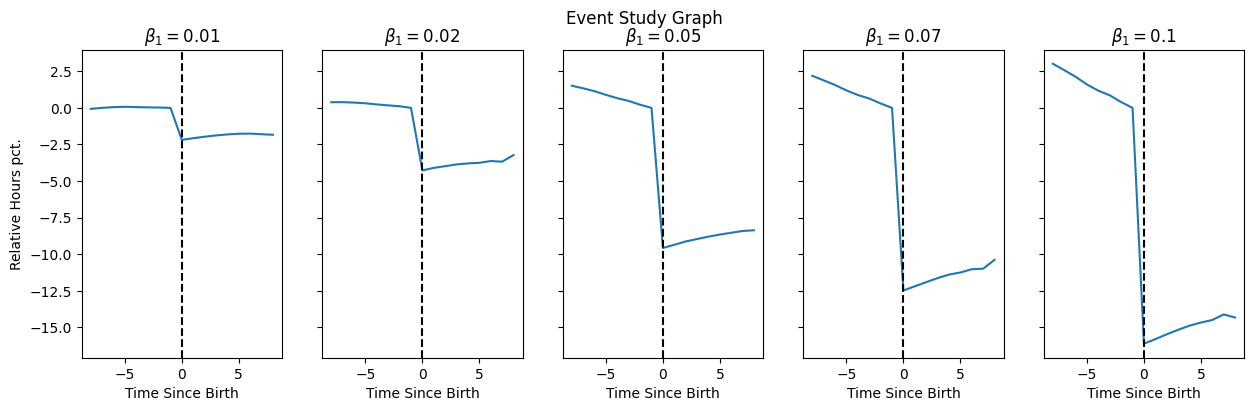

In [16]:
min_time = -8
max_time = 8
event_grid = np.arange(min_time, max_time + 1)

fig, axs = plt.subplots(1, len(simulations), figsize=(15, 4), sharey=True)
for i, (label, data) in enumerate(simulations.items()):
    for t, time in enumerate(event_grid):
        event_hours[t] = np.mean(data.h[time_since_birth == time])
    event_hours_rel = event_hours - event_hours[event_grid == -1]
    event_hours_pct = event_hours_rel / event_hours[event_grid == -1] * 100
    axs[i].plot(event_grid, event_hours_pct, label=label)
    axs[i].set_title(label)
    axs[i].set_xlabel('Time Since Birth')
    axs[i].axvline(x=0, color='k', ls='--')
axs[0].set_ylabel('Relative Hours pct.')
plt.suptitle('Event Study Graph')
plt.show()


# Problem 2

In [3]:
model_taxed = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'tau':0.101}) 
sim_taxed = model_taxed.sim
sol_taxed = model_taxed.sol
par_taxed = model_taxed.par
model_taxed.solve()
model_taxed.simulate()

In [4]:
labour_supply = np.mean(sim.h,axis=0)
real_wage = np.mean(baseline.wage_func(sim.k,np.arange(par.simT)),axis=0)
labour_supply_taxed = np.mean(sim_taxed.h,axis=0)
real_wage_taxed = np.mean(model_taxed.wage_func(sim_taxed.k,np.arange(par_taxed.simT)),axis=0)

In [10]:
labour_supply>labour_supply_taxed

NameError: name 'labour_supply' is not defined

In [9]:
mae = (np.log(labour_supply_taxed)-np.log(labour_supply))/(np.log(1-par.tau))

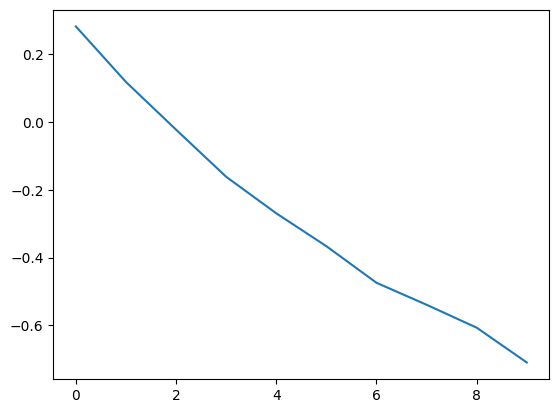

In [10]:
fig, axs = plt.subplots()
axs.plot(np.arange(par.T),mae)

# Problem 3
The spouse is introduced under `setup` in the `DynLaborFertModelClass` and is simply activated when the model is initialized

In [21]:
from DynLaborFertModel import DynLaborFertModelClass


In [3]:
baseline = model05.copy()
sim = baseline.sim
sol = baseline.sol
par = baseline.par
baseline.solve()
baseline.simulate()

In [4]:
m_spouse=DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3,'theta':1}) 
m_spouse.setup(spouse=True)
par_sp = m_spouse.par
sol_sp = m_spouse.sol
sim_sp = m_spouse.sim
m_spouse.solve()
m_spouse.simulate()

In [5]:
for m in (baseline,)
for var in ('c','a','h','n'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(sim,var),axis=0),label='Simulated')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));

namespace(c=array([[2.75991575, 2.75084959, 2.75506343, ..., 2.7465665 , 2.75888569,
                    2.75160457],
                   [2.75991575, 2.75084959, 2.75506343, ..., 2.7465665 , 2.75888569,
                    2.75160457],
                   [2.75991575, 2.75084959, 2.75506343, ..., 2.74656656, 2.75888568,
                    2.75160456],
                   ...,
                   [2.75991575, 2.75084959, 2.75506343, ..., 2.7465665 , 2.75888569,
                    2.75160457],
                   [2.75991575, 2.75084959, 2.75506343, ..., 2.74656656, 2.75888567,
                    2.75160457],
                   [2.75991575, 2.75084912, 2.75507774, ..., 2.74656396, 2.75888181,
                    2.75160435]]),
          h=array([[1.48053777, 1.48714323, 1.49043723, ..., 1.5062176 , 1.50425649,
                    1.50744207],
                   [1.48053777, 1.48714323, 1.49043723, ..., 1.5062176 , 1.50425649,
                    1.50744207],
                   [1.48053777

In [9]:
np.mean(sol_sp.h)>np.mean(sol.h)

True

In [30]:
np.mean(sim_sp.k,axis=0)>np.mean(sim.k,axis=0)

array([False, False, False, False, False, False, False,  True,  True,
        True])